In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

import json

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
matplotlib.rcParams['pdf.fonttype'] = 42
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns


## Fixing the million columns

In [2]:
dtypes = {
    'eventid': 'int',
    'iyear': 'int',
    'imonth': 'str',
    'iday': 'str',
    'country_txt': 'category',
    'region_txt': 'category',
    'provstate': 'category',
    'city': 'str',
    'latitude': 'float',
    'longitude': 'float',
    'summary': 'str',
    'crit1': 'int',
    'crit2': 'int',
    'crit3': 'int',
    'doubtterr': 'float',
    'success': 'float',
    'suicide': 'float',
    'attacktype1_txt': 'str',
    'attacktype2_txt': 'str',
    'attacktype3_txt': 'str',
    'targtype1_txt': 'str',
    'targsubtype1_txt': 'str',
    'natlty1_txt': 'str',
    'gname': 'category',
    'motive': 'str',
    'nperps': 'float',
    'nperpcap': 'float',
    'claimed': 'float',
    'weaptype1_txt': 'category',
    'weaptype2_txt': 'category',
    'nkill': 'float',
    'nkillter': 'float',
    'nwound': 'float',
    'propextent_txt': 'str',
    'nhostkid': 'float'
}

In [3]:
df = pd.read_excel('data/globalterrorismdb_0718dist.xlsx', na_values=['nan'], dtype=dtypes, usecols=['eventid', 'iyear', 'imonth', 'iday', 'country','country_txt', 'region_txt','provstate','city','latitude','longitude','summary','crit1','crit2','crit3','doubtterr','success','suicide','attacktype1_txt','attacktype2_txt','attacktype3_txt','targtype1_txt','targsubtype1_txt','natlty1_txt','gname','motive','nperps','nperpcap','claimed','weaptype1_txt','weaptype2_txt','weapdetail','nkill','nkillter','nwound','propextent_txt','nhostkid'])
df

,eventid,iyear,imonth,iday,country,country_txt,region_txt,provstate,city,latitude,longitude,summary,crit1,crit2,crit3,doubtterr,success,suicide,attacktype1_txt,attacktype2_txt,attacktype3_txt,targtype1_txt,targsubtype1_txt,natlty1_txt,gname,motive,nperps,nperpcap,claimed,weaptype1_txt,weaptype2_txt,weapdetail,nkill,nkillter,nwound,propextent_txt,nhostkid
0,-568495615,1970,7,2,58,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,1,1,1,0.0,1.0,0.0,Assassination,NaN,NaN,Private Citizens & Property,Named Civilian,Dominican Republic,MANO-D,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,NaN
1,-568495614,1970,0,0,130,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,1,1,1,0.0,1.0,0.0,Hostage Taking (Kidnapping),NaN,NaN,Government (Diplomatic),"Diplomatic Personnel (outside of embassy, consulate)",Belgium,23rd of September Communist League,NaN,7.0,NaN,NaN,Unknown,NaN,NaN,0.0,NaN,0.0,NaN,1.0
2,-567495615,1970,1,0,160,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,1,1,1,0.0,1.0,0.0,Assassination,NaN,NaN,Journalists & Media,Radio Journalist/Staff/Facility,United States,Unknown,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,1.0,NaN,0.0,NaN,NaN
3,-567495614,1970,1,0,78,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,1,1,1,0.0,1.0,0.0,Bombing/Explosion,NaN,NaN,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,NaN,NaN,Explosives,NaN,Explosive,NaN,NaN,NaN,NaN,NaN
4,-567495613,1970,1,0,101,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,1,1,1,-9.0,1.0,0.0,Facility/Infrastructure Attack,NaN,NaN,Government (Diplomatic),Embassy/Consulate,United States,Unknown,NaN,NaN,NaN,NaN,Incendiary,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN
5,-567485614,1970,1,1,217,United States,North America,Illinois,Cairo,37.005105,-89.176269,"1/1/1970: Unknown African American assailants fired several bullets at police headquarters in Cairo, Illinois, United States. There were no casualties, however, one bullet narrowly missed several police officers. This attack took place during heightened racial tensions, including a Black boycott of White-owned businesses, in Cairo Illinois.",1,1,1,0.0,1.0,0.0,Armed Assault,NaN,NaN,Police,"Police Building (headquarters, station, school)",United States,Black Nationalists,To protest the Cairo Illinois Police Deparment,-99.0,-99.0,0.0,Firearms,NaN,Several gunshots were fired.,0.0,0.0,0.0,Minor (likely < $1 million),NaN
6,-567475615,1970,1,2,218,Uruguay,South America,Montevideo,Montevideo,-34.891151,-56.187214,NaN,1,1,1,0.0,0.0,0.0,Assassination,NaN,NaN,Police,Police Security Forces/Officers,Uruguay,Tupamaros (Uruguay),NaN,3.0,NaN,NaN,Firearms,NaN,Automatic firearm,0.0,NaN,0.0,NaN,NaN
7,-567475614,1970,1,2,217,United States,North America,California,Oakland,37.791927,-122.225906,"1/2/1970: Unknown perpetrators detonated explosives at the Pacific Gas & Electric Company Edes substation in Oakland, California, United States. Three transformers were damaged costing an estimated $20,000 to $25,000. There were no casualties.",1,1,1,1.0,1.0,0.0,Bombing/Explosion,NaN,NaN,Utilities,Electricity,United States,Unknown,NaN,-99.0,-99.0,0.0,Explosives,NaN,NaN,0.0,0.0,0.0,Minor (likely < $1 million),NaN
8,-567475613,1970,1,2,217,United States,North America,Wisconsin,Madison,43.076592,-89.412488,"1/2/1970: Karl Armstrong, a member of the New Years Gang, threw a firebomb at R.O.T.C. offices located within the Old Red Gym at the University of Wisconsin in Madison, Wisconsin, United States. There were no casualties but the fire caused around $60,000 in damages to the building.",1,1,1,0.0,1.0,0.0,Facility/Infrastructure Attack,NaN,NaN,Military,Military Recruiting Station/Academy,United States,New Year's Gang,To protest the War in Vietnam and the draft,1.0,1.0,1.0,Incendiary,NaN,Firebomb consisting of gasoline,0.0,0.0,0.0,Minor (likely < $1 million),NaN
9,-567465615,1970,1,3,217,United States,North America,Wisconsin,Madison,43.072950,-89.386694,"1/3/1970: Karl Armst

## Reading in Census Bureau populations
Using 2018 population estimations

In [4]:
pops = pd.read_csv("data/scprc-est2018-18+pop-res.csv")

In [5]:
pops.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS
0,10,0,0,0,United States,327167434,253768092,77.6
1,40,3,6,1,Alabama,4887871,3798031,77.7
2,40,4,9,2,Alaska,737438,553622,75.1
3,40,4,8,4,Arizona,7171646,5528989,77.1
4,40,3,7,5,Arkansas,3013825,2310645,76.7


## I only want to look at U.S. events

In [35]:
df = df[(df['country_txt'] == 'United States') & (df.iyear > 2015)]

In [136]:
df.to_csv('data/terrorism_us_since_2016.csv', index=False)

In [36]:
df.gname.shape

(129,)

In [186]:
df.shape

(129, 48)

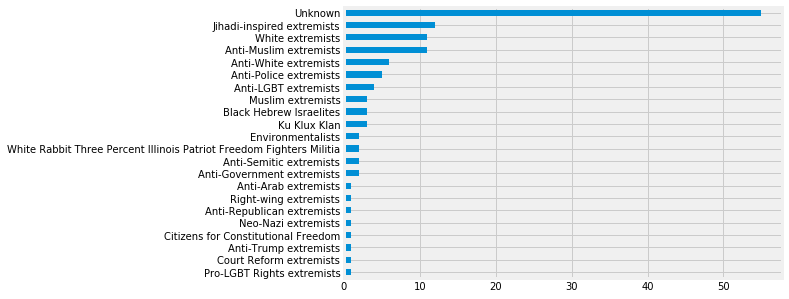

In [194]:
df.gname.value_counts().sort_values().plot(kind='barh', figsize=(7,5))

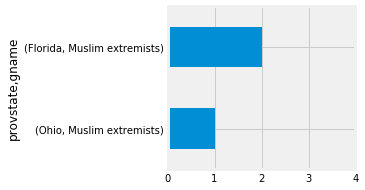

In [182]:
ax = df[df.gname == 'Muslim extremists'].groupby('provstate').gname.value_counts().sort_values().plot(kind='barh', figsize=(3,3), xlim=[0,4])

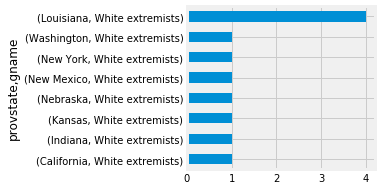

In [181]:
df[df.gname == 'White extremists'].groupby('provstate').gname.value_counts().sort_values().plot(kind='barh', figsize=(3,3))

In [38]:
df.nkill = df.nkill.astype(str)

In [39]:
## Export for qgis
df.to_csv("data/terrorism_us.csv", index=False)

## Mapbox?

In [66]:
def get_coords(x):
#     geometry = {}
    try:
        try:
            x['place'] = x.city+", "+x.provstate
        except:
            x['place'] = x.city
        x['geometry.type'] = 'Point'
        coords = []
        coords.append(x.longitude)
        coords.append(x.latitude)
        x['geometry.coordinates'] = coords
        return x
    except: 
        return nan

In [67]:
df = df.apply(get_coords, axis=1)

In [68]:
def prop_ids(x):
    if x['attacktype1_txt'] == "Facility/Infrastructure Attack":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#20365E"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 1
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Armed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#E84C3D"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 2
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Bombing/Explosion":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#D25302"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 3
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Unarmed Assault":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#FDDBB0"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 4
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Barricade Incident)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#354A5F"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 5
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Assassination":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#9A59B5"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 6
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hostage Taking (Kidnapping)":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#3598DB"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 7
        x['properties.radius'] = x.nkill
        return x
    elif x['attacktype1_txt'] == "Hijacking":
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 8
        x['properties.radius'] = x.nkill
        return x
    else:
        x['properties.name'] = x['attacktype1_txt']
        x['properties.color'] = "#1CBB9B"
        x['properties_color'] = x['properties.color']
        x['properties.group_name'] = x['properties.name']
        x['properties.group_id'] = 9
        x['properties.radius'] = x.nkill
        return x

In [69]:
df = df.apply(prop_ids, axis=1)

In [70]:
def prop_headline(x):
    return x

In [71]:
df['properties.headline'] = df.gname.apply(lambda x: prop_headline(x))

In [72]:
df.shape

(129, 48)

In [73]:
def prop_article(row):
    return f"\
    <div id='article_container'>\
    <h2>{row.gname}</h1>\
    <div id='headline'><h4 style='border-bottom: 3px solid {row.properties_color}'>{row.attacktype1_txt}</h2></div>\
    <p >{row.summary}</p>\
    <p><b>People killed:</b> {row.nkill} people</p>\
    <p><b>People Wounded:</b> {row.nwound}.</p>\
    <p><b>Target:</b> {row.targtype1_txt}\
    </div>" 


In [74]:
df['properties.article'] = df.apply(prop_article, axis=1)

In [75]:
df.to_csv("terrorism_us_map.csv", index=False)

In [76]:
map_df = pd.read_csv("terrorism_us_map.csv", thousands=",", usecols=['geometry.coordinates', 'geometry.type', 'properties.name', 'properties.headline', 'properties.article', 'properties.color', 'properties.group_id', 'properties.group_name', 'properties.radius'])

In [77]:
map_df['geometry.coordinates'] = map_df['geometry.coordinates'].apply(json.loads)

In [78]:
ok_json = json.loads(map_df.to_json(orient='records'))

In [79]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [80]:
geo_format = process_to_geojson(ok_json)

In [81]:
with open('geo-data.js', 'w') as outfile:
    outfile.write("var infoData = " + json.dumps(geo_format))

## Zooming out to look at each state

In [147]:
state_counts = pd.DataFrame(df['provstate'].value_counts()).reset_index()

In [148]:
state_counts.head()

,index,provstate
0,New York,18
1,Florida,13
2,California,9
3,Texas,8
4,Washington,6


In [149]:
state_counts = state_counts.merge(pops, left_on='index', right_on='NAME')

In [150]:
state_counts['per_capita'] = (state_counts['provstate'] / state_counts['POPESTIMATE2018']) * 10000000
state_counts

,index,provstate,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS,per_capita
0,New York,18,40,1,2,36,New York,19542209,15474107,79.2,9.210832
1,Florida,13,40,3,5,12,Florida,21299325,17070244,80.1,6.103480
2,California,9,40,4,9,6,California,39557045,30567090,77.3,2.275195
3,Texas,8,40,3,7,48,Texas,28701845,21303746,74.2,2.787277
4,Washington,6,40,4,9,53,Washington,7535591,5872306,77.9,7.962216
5,Pennsylvania,6,40,1,2,42,Pennsylvania,12807060,10158149,79.3,4.684916
6,Missouri,6,40,2,4,29,Missouri,6126452,4749622,77.5,9.793597
7,Louisiana,5,40,3,7,22,Louisiana,4659978,3564062,76.5,10.729664
8,Iowa,5,40,2,4,19,Iowa,3156145,2425378,76.8,15.842111
9,Nevada,5,40,4,8,32,Nevada,3034392,2345395,77.3,16.477766


Text(0, 0.5, '')

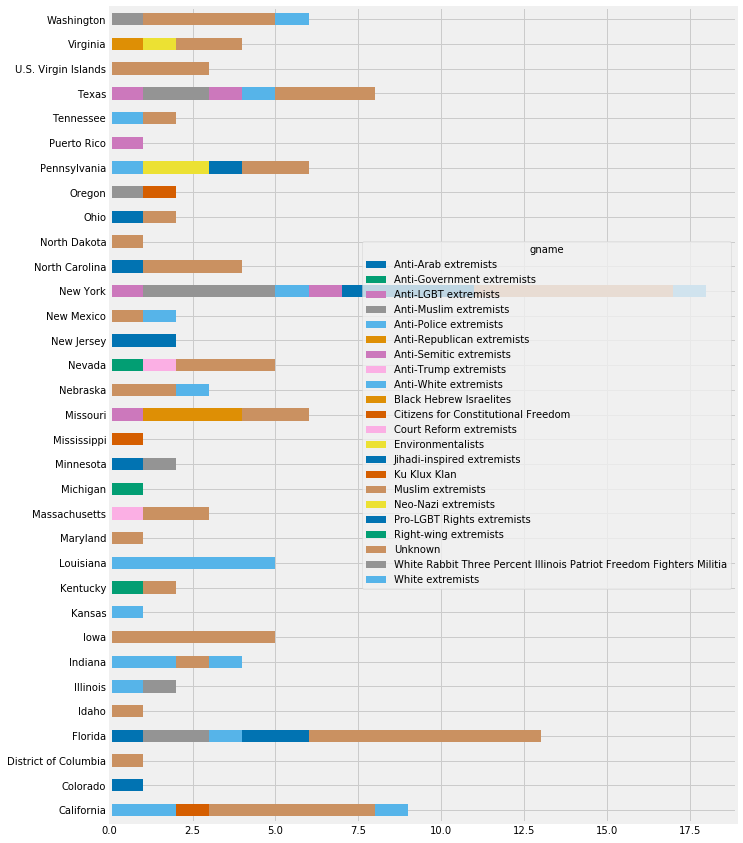

In [151]:
ax = df.groupby(by='provstate').gname.value_counts().unstack('gname').\
    plot(kind='barh', stacked=True, figsize=(10,15), legend=True, colormap=ListedColormap(sns.color_palette("colorblind", 50)))
ax.set_ylabel('')

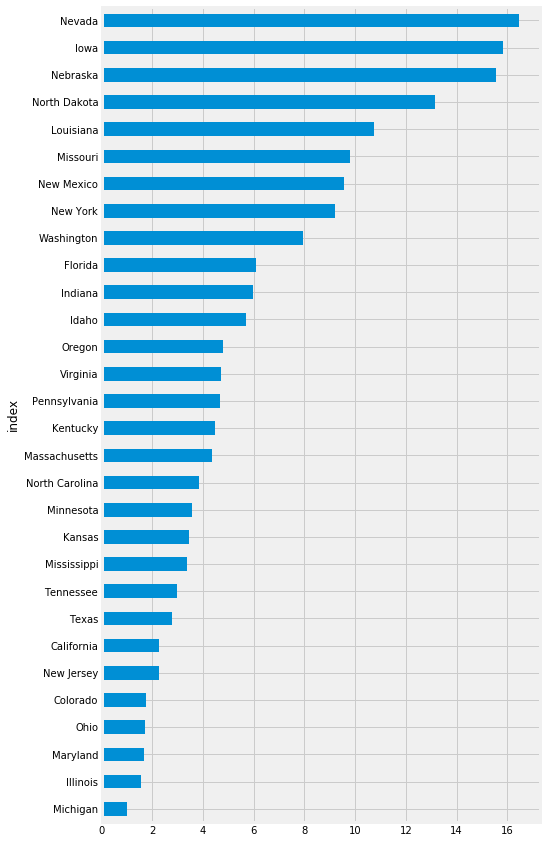

In [161]:
state_counts.sort_values(by='per_capita').plot(kind="barh", x='index', y='per_capita', figsize=(7,15), legend=False, width=.5)

In [154]:
latlong = pd.read_csv('C:/Users/sawye/Documents/Random__data/geographic/states/us-state-capitals.csv')

In [155]:
state_counts = state_counts.merge(latlong, right_on='state', left_on='index')

In [156]:
state_counts.head()

,index,provstate,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2018,POPEST18PLUS2018,PCNT_POPEST18PLUS,per_capita,state,description,Latitude,Longitude
0,New York,18,40,1,2,36,New York,19542209,15474107,79.2,9.210832,New York,Albany,42.652843,-73.757874
1,Florida,13,40,3,5,12,Florida,21299325,17070244,80.1,6.103480,Florida,Tallahassee,30.438118,-84.281296
2,California,9,40,4,9,6,California,39557045,30567090,77.3,2.275195,California,Sacramento,38.576668,-121.493629
3,Texas,8,40,3,7,48,Texas,28701845,21303746,74.2,2.787277,Texas,Austin,30.274670,-97.740349
4,Washington,6,40,4,9,53,Washington,7535591,5872306,77.9,7.962216,Washington,Olympia,47.035805,-122.905014


In [157]:
state_counts.to_csv('data/terrorism_by_state_since_2016.csv', index=False)